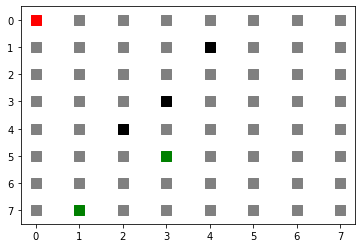

In [1]:
# Breadth first search:
import numpy as np
import matplotlib.pyplot as plt
n=8
class node:
    colour="gray"      #whichever location is not visited is shown by white
    x_c=-1
    y_c=-1
    parent_x=-1
    parent_y=-1
    action="nil"

grid=[[node() for i in range(n)] for j in range(n)]
for i in range(n):
    for j in range(n):
        grid[i][j].x_c=i
        grid[i][j].y_c=j
# x_start=int(input("The x coordinate of starting state:"))
# y_start=int(input("The y coordinate of starting state:"))
# grid[x_start][y_start].colour="red"                 #red represents the starting position
# no_of_blocked=int(input("Enter no of blocked locations:"))
# for i in range(no_of_blocked):
#     print((i+1),"Blocked location:")
#     x=int(input("Enter x coordinate of blocked location:"))
#     y=int(input("Enter y coordinate of blocked location:"))
#     grid[x][y].colour="black"                       #black represents thee blocked positions
# no_of_goals=int(input("Enter no of goals:"))
# for i in range(no_of_goals):
#     print((i+1),"Goal's location:")
#     x=int(input("Enter x coordinate of Goal's location:"))
#     y=int(input("Enter y coordinate of Goal's location:"))
#     grid[x][y].colour="green"                       #green represents the goal's position
no_of_goals=2
x_start=0
y_start=0
grid[0][0].colour="red"
grid[1][7].colour="green"
grid[3][5].colour="green"
grid[3][3].colour="black"
grid[2][4].colour="black"
grid[4][1].colour="black"
g1=[[node() for i in range(n)] for j in range(n)]
g2=[[node() for i in range(n)] for j in range(n)]
for i in range(n):
    for j in range(n):
        plt.scatter(i,j,color=grid[i][j].colour,s=100,marker='s')
plt.ylim(-.5,(n-0.5))
plt.gca().invert_yaxis()
plt.show()
#initial condition of the grid

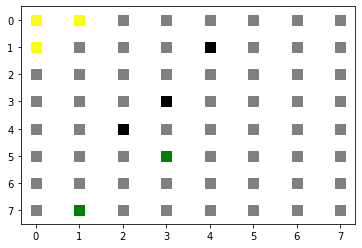

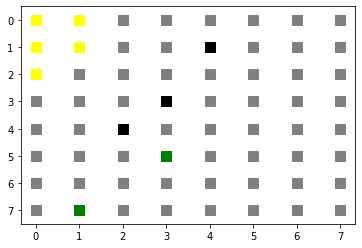

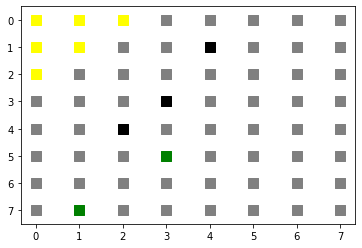

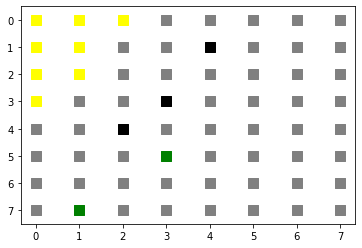

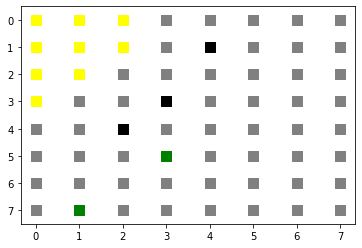

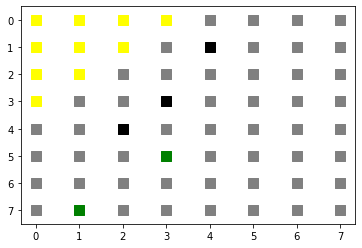

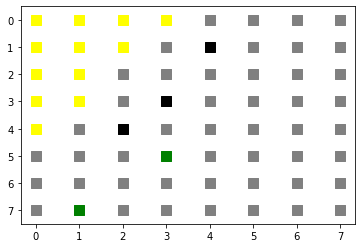

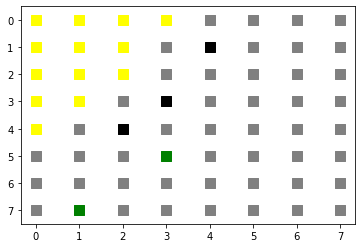

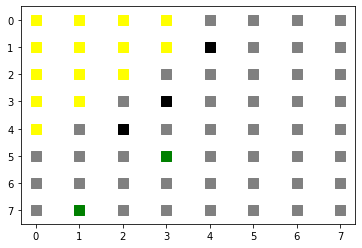

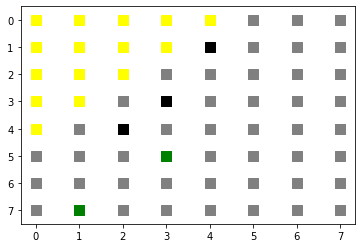

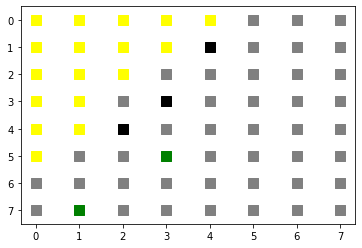

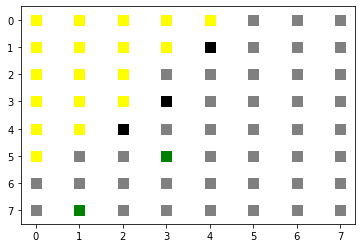

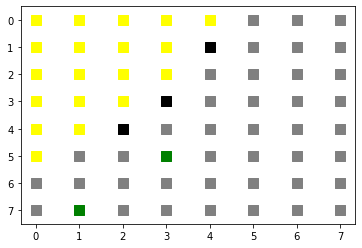

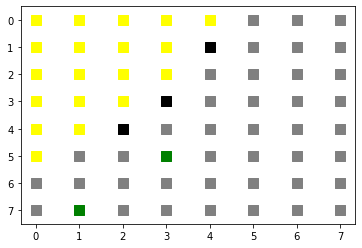

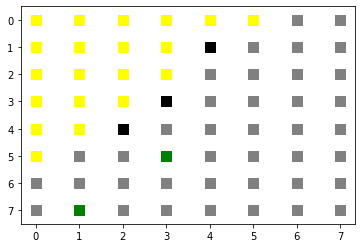

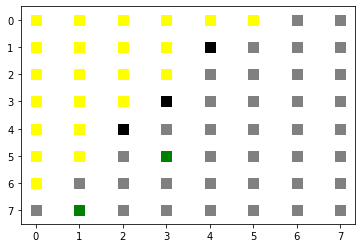

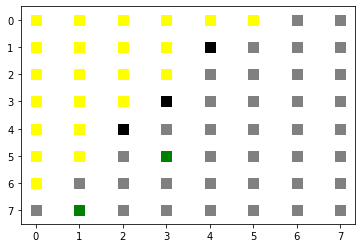

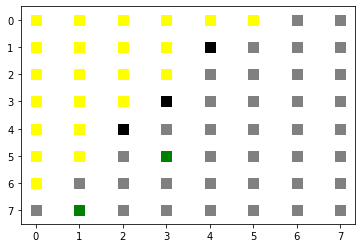

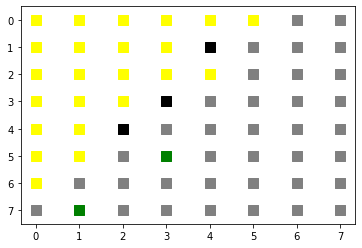

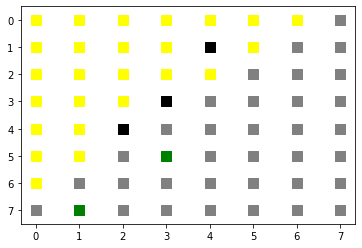

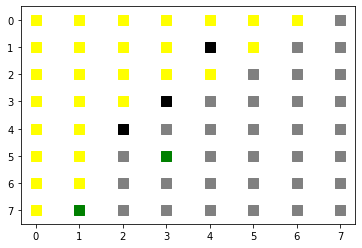

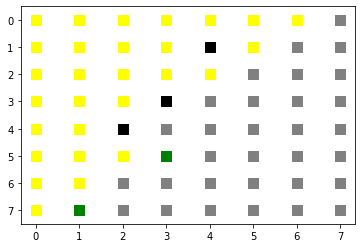

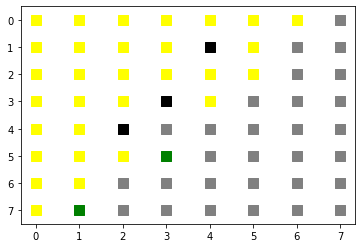

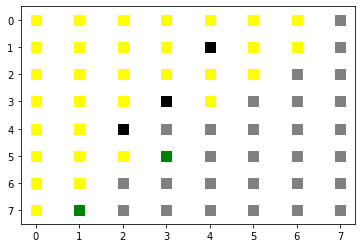

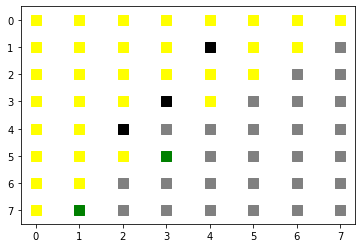

1 goal is at position: ( 1 , 7 )


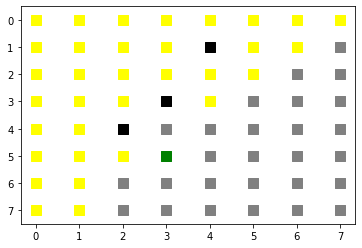

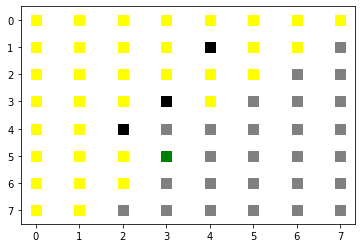

2 goal is at position: ( 3 , 5 )


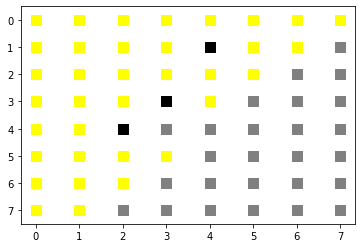

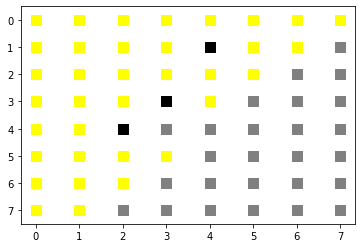

Path for goal 1 :


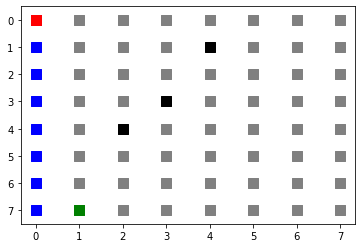

Path for goal 2 :


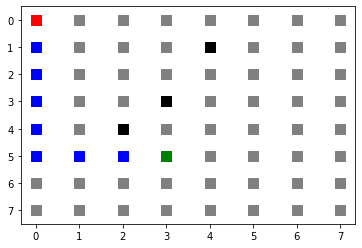

In [2]:
import copy
q=[]        #Initialize a queue
def bfs(g,node):
    node.colour="yellow"
    node.action="start"
    q.append(node)
    goals_reached=0
    goal_x,goal_y=[],[]
    while len(q)!=0:
        front=q.pop(0)
        if (goals_reached==no_of_goals):    #if all the goals are reached then exit from the function
            return g,goal_x,goal_y
        if front.y_c!=0 :
            if (g[front.x_c][front.y_c-1].colour=="gray" or g[front.x_c][front.y_c-1].colour=="green"):  #for up action state
                if g[front.x_c][front.y_c-1].colour=="green":
                    goals_reached+=1
                    goal_x.append(front.x_c)
                    goal_y.append(front.y_c-1)
                    print(goals_reached,"goal is at position: (",g[front.x_c][front.y_c-1].x_c,",",g[front.x_c][front.y_c-1].y_c,")")
                g[front.x_c][front.y_c-1].colour="yellow"
                g[front.x_c][front.y_c-1].parent_x=front.x_c
                g[front.x_c][front.y_c-1].parent_y=front.y_c
                g[front.x_c][front.y_c-1].action="up"
                q.append(g[front.x_c][front.y_c-1])

        if front.y_c!=(n-1):
            if (g[front.x_c][front.y_c+1].colour=="gray" or g[front.x_c][front.y_c+1].colour=="green"):  #for down action
                if g[front.x_c][front.y_c+1].colour=="green":
                    goals_reached+=1
                    goal_x.append(front.x_c)
                    goal_y.append(front.y_c+1)
                    print(goals_reached,"goal is at position: (",g[front.x_c][front.y_c+1].x_c,",",g[front.x_c][front.y_c+1].y_c,")")
                g[front.x_c][front.y_c+1].colour="yellow"
                g[front.x_c][front.y_c+1].parent_x=front.x_c
                g[front.x_c][front.y_c+1].parent_y=front.y_c
                g[front.x_c][front.y_c+1].action="down"
                q.append(g[front.x_c][front.y_c+1])
  
        if front.x_c!=0 :
            if (g[front.x_c-1][front.y_c].colour=="gray" or g[front.x_c-1][front.y_c].colour=="green"):  #for left action
                if g[front.x_c-1][front.y_c].colour=="green":
                    goals_reached+=1
                    goal_x.append(front.x_c-1)
                    goal_y.append(front.y_c)
                    print(goals_reached,"goal is at position: (",g[front.x_c-1][front.y_c].x_c,",",g[front.x_c-1][front.y_c].y_c,")")
                g[front.x_c-1][front.y_c].colour="yellow"
                g[front.x_c-1][front.y_c].parent_x=front.x_c
                g[front.x_c-1][front.y_c].parent_y=front.y_c
                g[front.x_c-1][front.y_c].action="left"
                q.append(g[front.x_c-1][front.y_c])

        
        if front.x_c!=(n-1) :
            if (g[front.x_c+1][front.y_c].colour=="gray" or g[front.x_c+1][front.y_c].colour=="green"):  #for right action
                if g[front.x_c+1][front.y_c].colour=="green":
                    goals_reached+=1
                    goal_x.append(front.x_c+1)
                    goal_y.append(front.y_c)
                    print(goals_reached,"goal is at position: (",g[front.x_c+1][front.y_c].x_c,",",g[front.x_c+1][front.y_c].y_c,")")
                g[front.x_c+1][front.y_c].colour="yellow"
                g[front.x_c+1][front.y_c].parent_x=front.x_c
                g[front.x_c+1][front.y_c].parent_y=front.y_c
                g[front.x_c+1][front.y_c].action="right"
                q.append(g[front.x_c+1][front.y_c])
        for i in range(n):
            for j in range(n):
                plt.scatter(i,j,color=g[i][j].colour,s=100,marker='s')
        plt.ylim(-.5,(n-0.5))
        plt.gca().invert_yaxis()
        plt.show()
    return g,goal_x,goal_y
grid,goal_x,goal_y=bfs(grid,grid[x_start][y_start])
for i in range(n):
    for j in range(n):
        plt.scatter(i,j,color=grid[i][j].colour,s=100,marker='s')
plt.ylim(-.5,(n-0.5))
plt.gca().invert_yaxis()
plt.show()

for k in range(no_of_goals):
    print("Path for goal",k+1,":")
    x,y=[],[]
    for i in range(n):
        for j in range(n):
            if grid[i][j].colour!="black":
                grid[i][j].colour="gray"
    px,py=goal_x[k],goal_y[k]
    i=-1
    while grid[px][py].action!="start":
        i+=1
        x.append(grid[px][py].parent_x)
        y.append(grid[px][py].parent_y)
        px,py=x[i],y[i]
        grid[px][py].colour="blue"
    i=0
    for i in range(n):
        for j in range(n):
            plt.scatter(i,j,color=grid[i][j].colour,s=100,marker='s')
    plt.scatter(goal_x[k],goal_y[k],color="green",s=100,marker='s')
    plt.scatter(x_start,y_start,color="red",s=100,marker='s')
    plt.ylim(-.5,(n-0.5))
    plt.gca().invert_yaxis()
    plt.show()


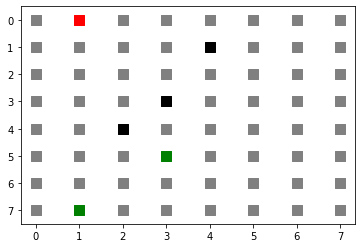

In [ ]:
# Depth first search:
import numpy as np
import matplotlib.pyplot as plt
n=8
class node:
    colour="gray"      #whichever location is not visited is shown by white
    x_c=-1
    y_c=-1
    parent_x=-1
    parent_y=-1
    action="nil"

grid=[[node() for i in range(n)] for j in range(n)]
for i in range(n):
    for j in range(n):
        grid[i][j].x_c=i
        grid[i][j].y_c=j
# x_start=int(input("The x coordinate of starting state:"))
# y_start=int(input("The y coordinate of starting state:"))
# grid[x_start][y_start].colour="red"                 #red represents the starting position
# no_of_blocked=int(input("Enter no of blocked locations:"))
# for i in range(no_of_blocked):
#     print((i+1),"Blocked location:")
#     x=int(input("Enter x coordinate of blocked location:"))
#     y=int(input("Enter y coordinate of blocked location:"))
#     grid[x][y].colour="black"                       #black represents thee blocked positions
# no_of_goals=int(input("Enter no of goals:"))
# for i in range(no_of_goals):
#     print((i+1),"Goal's location:")
#     x=int(input("Enter x coordinate of Goal's location:"))
#     y=int(input("Enter y coordinate of Goal's location:"))
#     grid[x][y].colour="green"                       #green represents the goal's position
no_of_goals=2
x_start=1
y_start=0
grid[1][0].colour="red"
grid[1][7].colour="green"
grid[3][5].colour="green"
grid[3][3].colour="black"
grid[2][4].colour="black"
grid[4][1].colour="black"
goal_x,goal_y=[1,3],[7,5]
for i in range(n):
    for j in range(n):
        plt.scatter(i,j,color=grid[i][j].colour,s=100,marker='s')
plt.ylim(-.5,(n-0.5))
plt.gca().invert_yaxis()
plt.show()
#initial condition of the grid

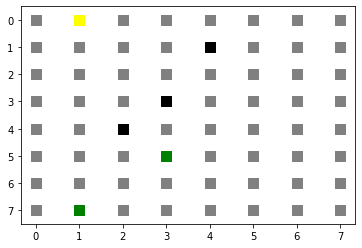

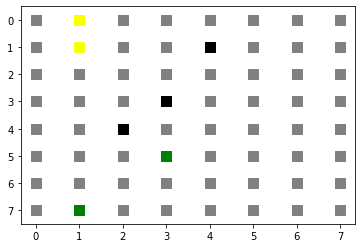

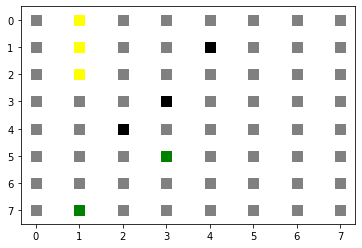

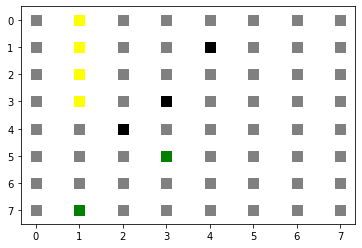

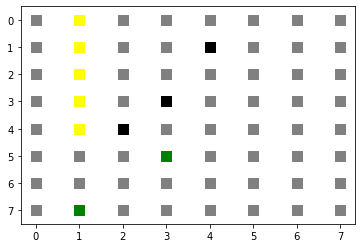

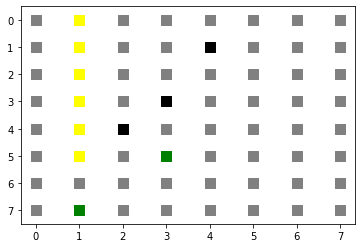

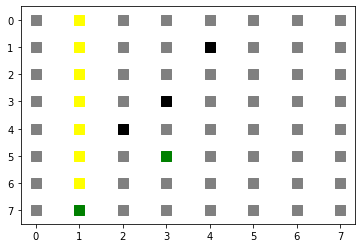

1 goal is at position: ( 1 , 7 )


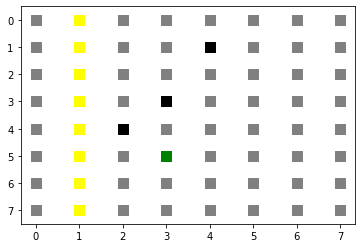

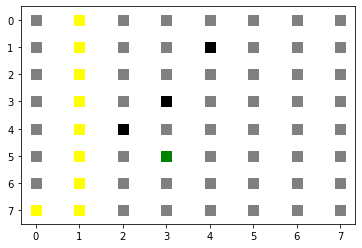

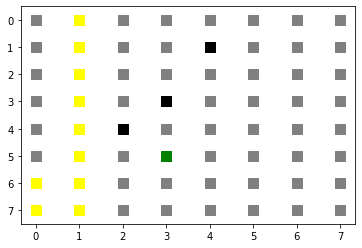

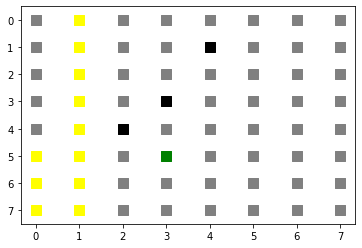

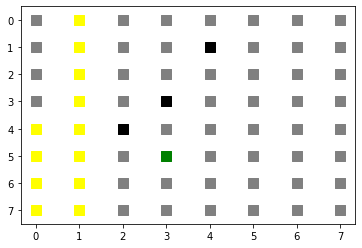

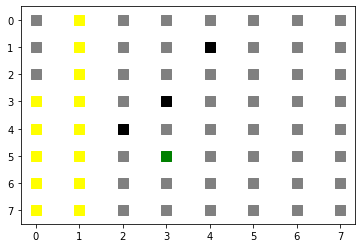

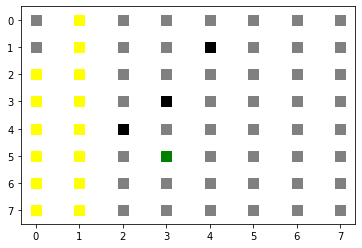

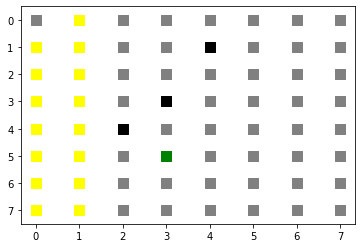

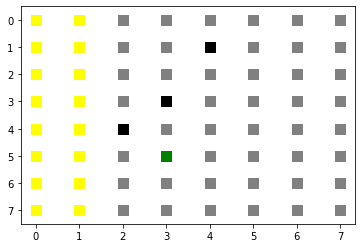

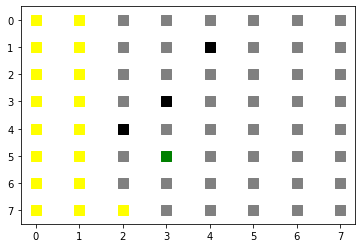

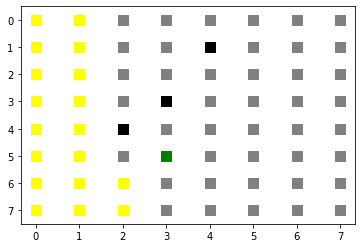

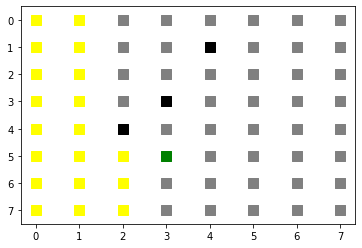

2 goal is at position: ( 3 , 5 )


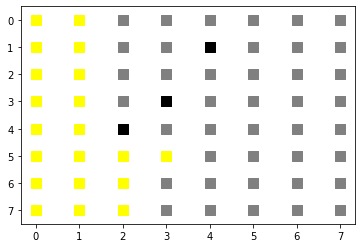

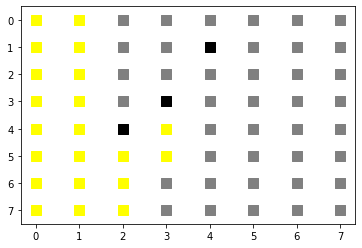

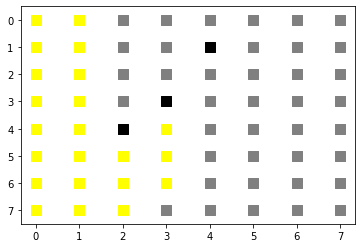

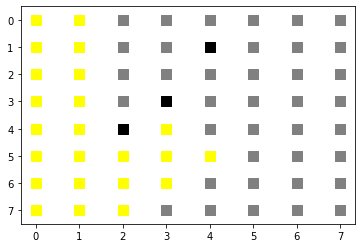

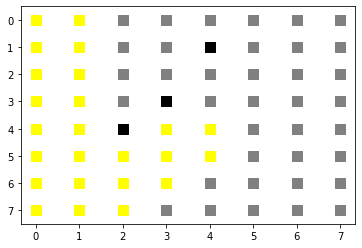

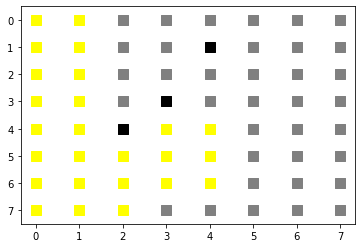

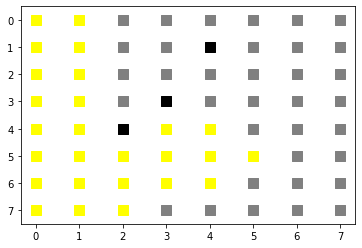

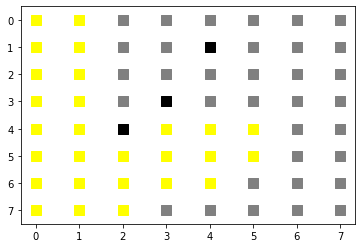

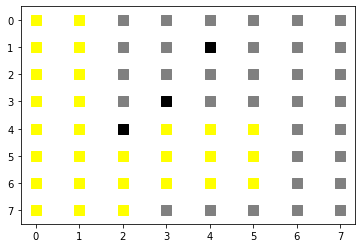

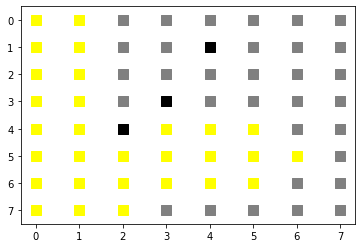

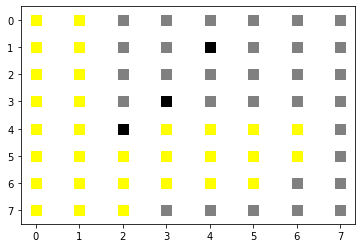

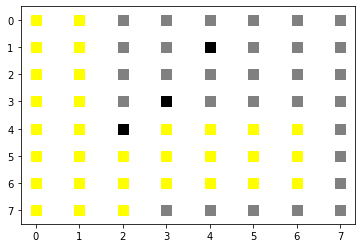

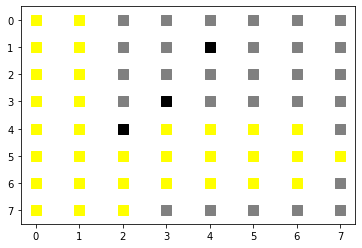

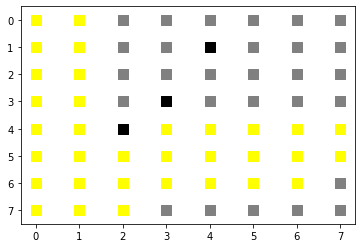

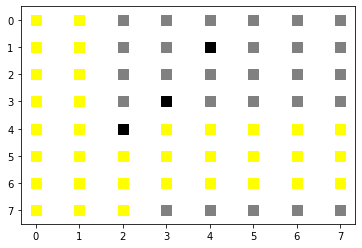

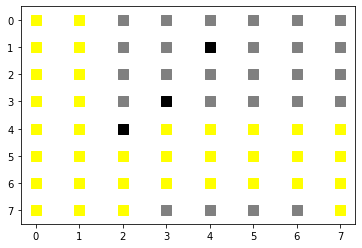

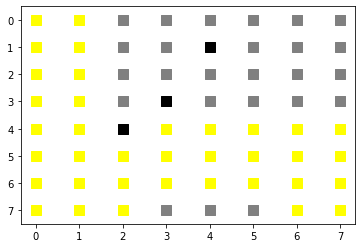

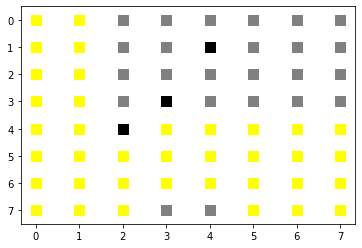

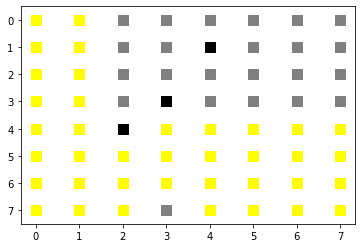

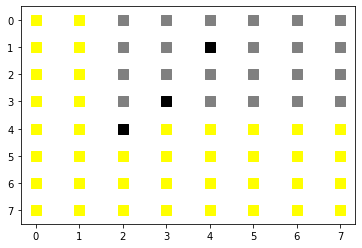

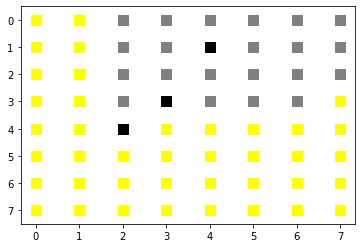

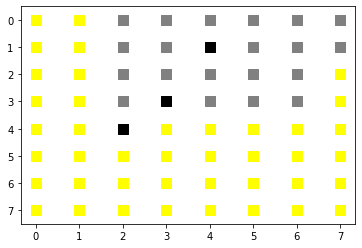

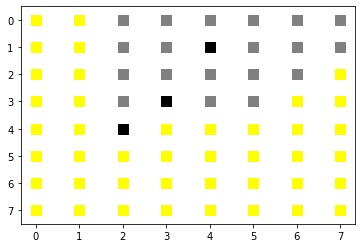

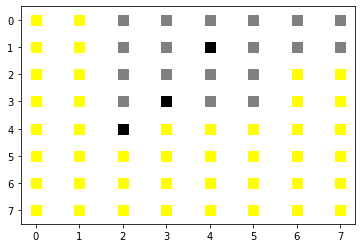

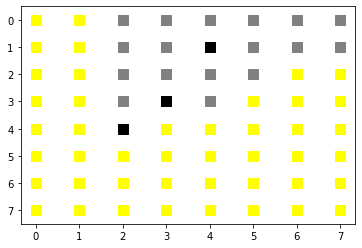

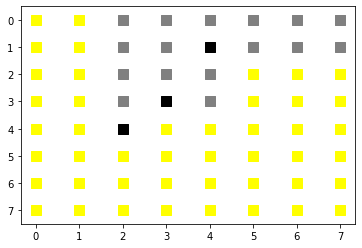

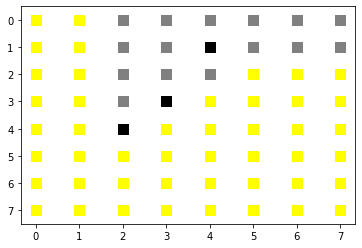

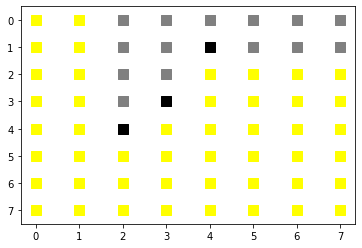

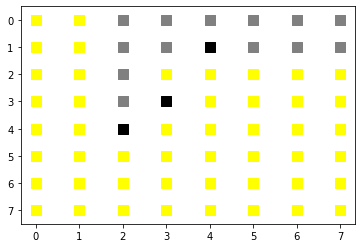

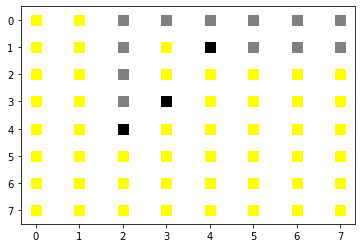

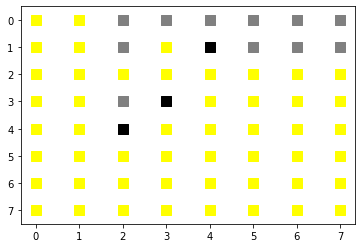

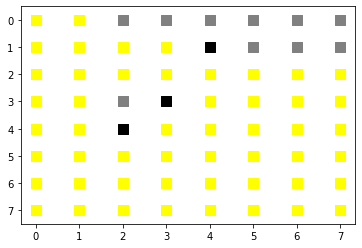

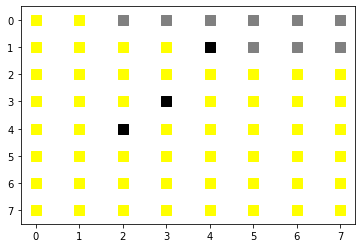

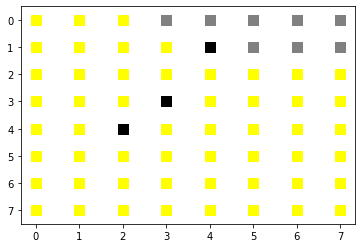

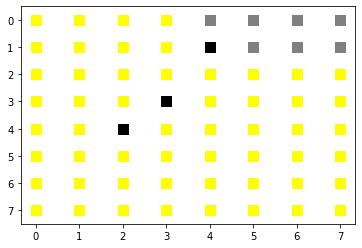

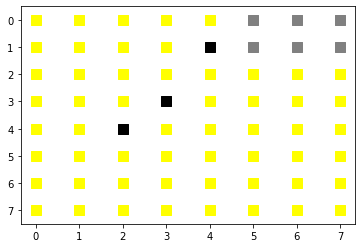

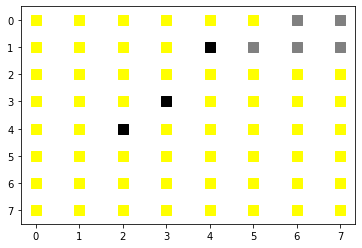

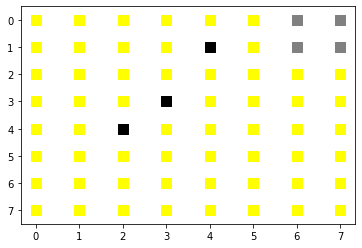

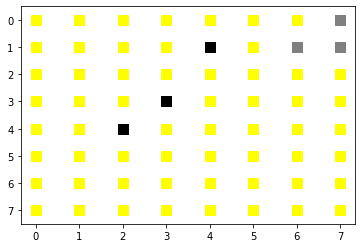

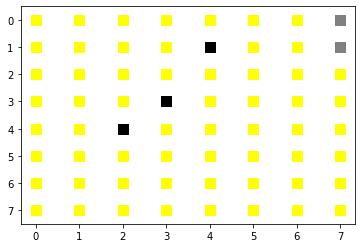

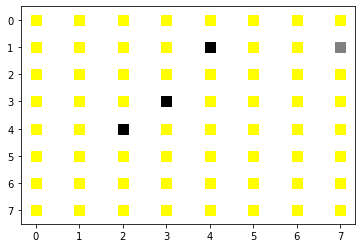

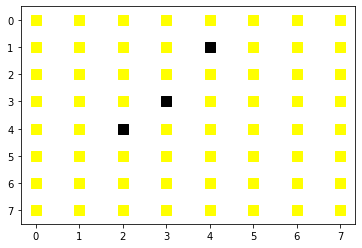

Path for goal 1 :


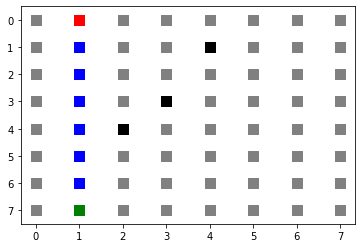

Path for goal 2 :


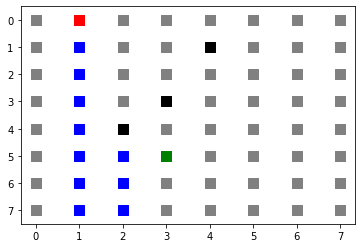

In [ ]:
from queue import LifoQueue
stack=LifoQueue()        #Initialize a stackueue
goals_reached=0
grid[x_start][y_start].action="start"
def DFS(g,node,goals_reached):
    node.colour="yellow"
    stack.put(node)
    for i in range(n):
        for j in range(n):
            plt.scatter(i,j,color=g[i][j].colour,s=100,marker='s')
    plt.ylim(-.5,(n-0.5))
    plt.gca().invert_yaxis()
    plt.show()
    if (goals_reached==no_of_goals):    #if all the goals are reached then exit from the function
        return g
    while stack.qsize()!=0:
        top=stack.get()
        if top.y_c!=0 :
            if (g[top.x_c][top.y_c-1].colour=="gray" or g[top.x_c][top.y_c-1].colour=="green"):  #for up action state
                if g[top.x_c][top.y_c-1].colour=="green":
                    goals_reached+=1
                    print(goals_reached,"goal is at position: (",g[top.x_c][top.y_c-1].x_c,",",g[top.x_c][top.y_c-1].y_c,")")
                g[top.x_c][top.y_c-1].colour="yellow"
                g[top.x_c][top.y_c-1].parent_x=top.x_c
                g[top.x_c][top.y_c-1].parent_y=top.y_c
                g[top.x_c][top.y_c-1].action="up"
                stack.put(g[top.x_c][top.y_c-1])
                DFS(g,g[top.x_c][top.y_c-1],goals_reached)

        if top.y_c!=(n-1):
            if (g[top.x_c][top.y_c+1].colour=="gray" or g[top.x_c][top.y_c+1].colour=="green"):  #for down action
                if g[top.x_c][top.y_c+1].colour=="green":
                        goals_reached+=1
                        print(goals_reached,"goal is at position: (",g[top.x_c][top.y_c+1].x_c,",",g[top.x_c][top.y_c+1].y_c,")")
                g[top.x_c][top.y_c+1].colour="yellow"
                g[top.x_c][top.y_c+1].parent_x=top.x_c
                g[top.x_c][top.y_c+1].parent_y=top.y_c
                g[top.x_c][top.y_c+1].action="down"
                stack.put(g[top.x_c][top.y_c+1])
                DFS(g,g[top.x_c][top.y_c+1],goals_reached)

        if top.x_c!=0 :
            if (g[top.x_c-1][top.y_c].colour=="gray" or g[top.x_c-1][top.y_c].colour=="green"):  #for left action
                if g[top.x_c-1][top.y_c].colour=="green":
                    goals_reached+=1
                    print(goals_reached,"goal is at position: (",g[top.x_c-1][top.y_c].x_c,",",g[top.x_c-1][top.y_c].y_c,")")
                g[top.x_c-1][top.y_c].colour="yellow"
                g[top.x_c-1][top.y_c].parent_x=top.x_c
                g[top.x_c-1][top.y_c].parent_y=top.y_c
                g[top.x_c-1][top.y_c].action="left"
                stack.put(g[top.x_c-1][top.y_c])
                DFS(g,g[top.x_c-1][top.y_c],goals_reached)

        if top.x_c!=(n-1) :
            if (g[top.x_c+1][top.y_c].colour=="gray" or g[top.x_c+1][top.y_c].colour=="green"):  #for right action
                if g[top.x_c+1][top.y_c].colour=="green":
                    goals_reached+=1
                    print(goals_reached,"goal is at position: (",g[top.x_c+1][top.y_c].x_c,",",g[top.x_c+1][top.y_c].y_c,")")
                g[top.x_c+1][top.y_c].colour="yellow"
                g[top.x_c+1][top.y_c].parent_x=top.x_c
                g[top.x_c+1][top.y_c].parent_y=top.y_c
                g[top.x_c+1][top.y_c].action="right"
                stack.put(g[top.x_c-1][top.y_c])
                DFS(g,g[top.x_c+1][top.y_c],goals_reached)

    for i in range(n):
        for j in range(n):
            plt.scatter(i,j,color=g[i][j].colour,s=100,marker='s')
    plt.ylim(-.5,(n-0.5))
    return g
new_g=DFS(grid,grid[x_start][y_start],goals_reached)
for k in range(no_of_goals):
    print("Path for goal",k+1,":")
    x,y=[],[]
    for i in range(n):
        for j in range(n):
            if grid[i][j].colour!="black":
                grid[i][j].colour="gray"
    px,py=goal_x[k],goal_y[k]
    i=-1
    while grid[px][py].action!="start":
        i+=1
        x.append(grid[px][py].parent_x)
        y.append(grid[px][py].parent_y)
        px,py=x[i],y[i]
        grid[px][py].colour="blue"
    i=0
    for i in range(n):
        for j in range(n):
            plt.scatter(i,j,color=grid[i][j].colour,s=100,marker='s')
    plt.scatter(goal_x[k],goal_y[k],color="green",s=100,marker='s')
    plt.scatter(x_start,y_start,color="red",s=100,marker='s')
    plt.ylim(-.5,(n-0.5))
    plt.gca().invert_yaxis()
    plt.show()

In [ ]:
#   Q3) Puzzle
import numpy as np
import copy
n=3
class node():
    def __init__(self,state=np.zeros(n*n),parent=None,action="start"):
        self.state =state
        self.parent = parent
        self.action=action

#Frontier is an queue
Frontier=[]     
#Explored is an set of states which has been explored
Explored={}

#Initial node as defined in Question:
Start=node()
Start.state=['2','6','s','4','3','7','5','s','1']
Explored["1234567ss"]="goal"

def list_to_string(l):
    str=""
    for element in l:
        str+=element
    return str
#Defining all the action state below:
#For the up movement of the empty space
def up(parent,pos):
    action=True
    N=node()
    N.state=copy.deepcopy(parent.state)
    if pos<n:
        N.action="None"
        action=False
    else:
        N.action="up"
        #swap the space with upper element in list
        N.state[pos],N.state[pos-n]=N.state[pos-n],N.state[pos]
    return N,action

#for the down movement of the emoty space
def down(parent,pos):
    action=True
    N=node()
    N.state=copy.deepcopy(parent.state)
    if pos>=((n*n)-n):
        N.action="None"
        action = False
    else:
        N.action="down"
        #swap the space with below element in list
        N.state[pos],N.state[pos+n]=N.state[pos+n],N.state[pos]
    return N,action

#for the right movement of the empty space
def right(parent,pos):
    action=True
    N=node()
    N.state=copy.deepcopy(parent.state)
    if (pos+1)%n==0:
        N.action="None"
        action=False
    else:
        N.action="right"
        #swap the space with right element in list
        N.state[pos],N.state[pos+1]=N.state[pos+1],N.state[pos]
    return N,action
#For the left movement of the empty space
def left(parent,pos):
    action= True
    N=node()
    N.state=copy.deepcopy(parent.state)
    if (pos+1)%n==1:
        N.action="None"
        action=False
    else:
        N.action="left"
        #swap the space with left element in list
        N.state[pos],N.state[pos-1]=N.state[pos-1],N.state[pos]
    return N,action

#Using graph based BFS to reach goal state:
def BFS(start):
    Frontier.append(start)
    No_of_steps=0
    while Frontier:
        No_of_steps+=1
        front=Frontier.pop(0)
        pos1,pos2,flag=0,0,0
        #For getting the positions of 's'
        for i in range(len(front.state)):
            if flag==0 and front.state[i]=='s':
                pos1=i
                flag+=1
            if flag==1 and front.state[i]=='s':
                pos2=i
        #Slide up first s
        N,swap=up(front,pos1)
        N.parent=front
        string=list_to_string(N.state)
        if swap and Explored.get(string,None)==None:
            Explored[string]="1"
            Frontier.append(N)  
        elif swap and Explored[string]=="goal":
            return N,No_of_steps   
        #Slide down first s
        N,swap=down(front,pos1)
        N.parent=front
        string=list_to_string(N.state)
        if swap and Explored.get(string,None)==None:
            Explored[string]="1"
            Frontier.append(N)  
        elif swap and Explored[string]=="goal":
            return N,No_of_steps  
        #Slide right first s
        N,swap=right(front,pos1)
        N.parent=front
        string=list_to_string(N.state)
        if swap and Explored.get(string,None)==None:
            Explored[string]="1"
            Frontier.append(N)  
        elif swap and Explored[string]=="goal":
            return N,No_of_steps 
        #Slide left first s
        N,swap=left(front,pos1)
        N.parent=front
        string=list_to_string(N.state)
        if swap and Explored.get(string,None)==None:
            Explored[string]="1"
            Frontier.append(N)  
        elif swap and Explored[string]=="goal":
            return N,No_of_steps 
        #Slide up second s
        N,swap=up(front,pos2)
        N.parent=front
        string=list_to_string(N.state)
        if swap and Explored.get(string,None)==None:
            Explored[string]="1"
            Frontier.append(N)  
        elif swap and Explored[string]=="goal":
            return N,No_of_steps  
        #Slide down second s
        N,swap=down(front,pos2)
        N.parent=front
        string=list_to_string(N.state)
        if swap and Explored.get(string,None)==None:
            Explored[string]="1"
            Frontier.append(N)  
        elif swap and Explored[string]=="goal":
            return N,No_of_steps 
        #Slide right second s
        N,swap=right(front,pos2)
        N.parent=front
        string=list_to_string(N.state)
        if swap and Explored.get(string,None)==None:
            Explored[string]="1"
            Frontier.append(N)  
        elif swap and Explored[string]=="goal":
            return N,No_of_steps  
        #Slide left second s
        N,swap=left(front,pos2)
        N.parent=front
        string=list_to_string(N.state)
        if swap and Explored.get(string,None)==None:
            Explored[string]="1"
            Frontier.append(N)  
        elif swap and Explored[string]=="goal":
            return N,No_of_steps  

goal,No_of_steps=BFS(Start)
print("GOAL REACHED AND GOAL STATE:",goal.state)
print("No. of steps to reach goal:",No_of_steps)

GOAL REACHED AND GOAL STATE: ['1', '2', '3', '4', '5', '6', '7', 's', 's']
No. of steps to reach goal: 68368


In [ ]:
from queue import LifoQueue
stack=LifoQueue()        #Initialize a stackueue
itr=0
N=goal
while N.parent!=None:
    stack.put(N)
    N=N.parent
print("No of steps to reach the goal is",stack.qsize())
print("The initial configuration given in question:",end="")
for i in range(n*n):
    if (i)%n==0:
        print("")
    print(N.state[i],end=" ")
while stack.qsize():
    N=stack.get()
    print("\nAction:",N.action)
    print("The current configuration:",end="")
    for i in range(n*n):
        if (i)%n==0:
            print("")
        print(N.state[i],end=" ")

No of steps to reach the goal is 16
The initial configuration given in question:
2 6 s 
4 3 7 
5 s 1 
Action: left
The current configuration:
2 s 6 
4 3 7 
5 s 1 
Action: down
The current configuration:
2 3 6 
4 s 7 
5 s 1 
Action: right
The current configuration:
2 3 6 
4 s 7 
5 1 s 
Action: down
The current configuration:
2 3 6 
4 1 7 
5 s s 
Action: left
The current configuration:
2 3 6 
4 1 7 
s 5 s 
Action: up
The current configuration:
2 3 6 
s 1 7 
4 5 s 
Action: right
The current configuration:
2 3 6 
1 s 7 
4 5 s 
Action: down
The current configuration:
2 3 6 
1 5 7 
4 s s 
Action: up
The current configuration:
2 3 6 
1 5 s 
4 s 7 
Action: up
The current configuration:
2 3 s 
1 5 6 
4 s 7 
Action: left
The current configuration:
2 s 3 
1 5 6 
4 s 7 
Action: left
The current configuration:
s 2 3 
1 5 6 
4 s 7 
Action: down
The current configuration:
1 2 3 
s 5 6 
4 s 7 
Action: down
The current configuration:
1 2 3 
4 5 6 
s s 7 
Action: right
The current configuration:
1 2 3 
